In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('../compiledData.csv').drop(columns=['Unnamed: 0', 'Date'])
data = data.rename(columns={'Good_time_to_Buy': "Good_TTB", 'Uncertain': "Uncertain_TTB", "Bad_time_to_Buy": 'Bad_TTB'})

In [35]:
data = data.loc[(data['Year'] == 2015) | (data['Year'] == 2016)]
data = data.reset_index().drop(columns=['index'])
data

,Symbol,Year,Month,Day,Open,High,Low,Close,Volume,Good_TTB,Uncertain_TTB,Bad_TTB,Relative
0,TM,2015,1,2,119.620,120.010,118.340,119.080,263779,74.0,3.0,23.0,151.0
1,TM,2015,1,5,117.930,118.090,116.600,116.910,253842,74.0,3.0,23.0,151.0
2,TM,2015,1,6,116.940,117.250,114.870,115.710,301389,74.0,3.0,23.0,151.0
3,TM,2015,1,7,118.940,119.470,118.510,118.620,407050,74.0,3.0,23.0,151.0
4,TM,2015,1,8,119.820,121.020,119.820,120.900,526309,74.0,3.0,23.0,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,RACE,2016,12,23,57.877,57.946,57.590,57.768,342461,65.0,7.0,28.0,137.0
2818,RACE,2016,12,27,57.847,57.976,57.619,57.728,131968,65.0,7.0,28.0,137.0
2819,RACE,2016,12,28,57.590,57.709,57.134,57.194,175311,65.0,7.0,28.0,137.0
2820,RACE,2016,12,29,57.600,57.728,57.075,57.233,192467,65.0,7.0,28.0,137.0


In [31]:
tm = data[data['Symbol'] == 'TM']
ttm = data[data['Symbol'] == 'TTM']
hmc = data[data['Symbol'] == 'HMC']
gm = data[data['Symbol'] == 'GM']
f = data[data['Symbol'] == 'F']
race = data[data['Symbol'] == 'RACE']

# Ford (F)

In [5]:
fX = []
fY = []
for index, row in data.iterrows():
    ifX = []
    ifX.append(row['Close'])
    ifX.append(row['Volume'])
    fX.append(ifX)
    fY.append(row['Relative'])

In [18]:
from sklearn.datasets import make_blobs as mb
fX, fY = mb(n_samples=len(fX), centers=15, cluster_std=0.7, random_state=0)

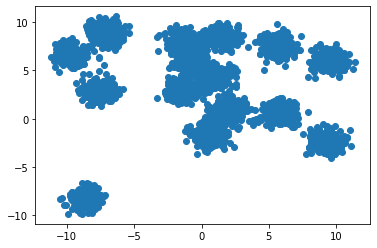

In [19]:
plt.scatter(fX[:, 0], fX[:, 1])
plt.show()

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=42)

# Fit the model to the data
kmeans.fit(fX)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(fX)

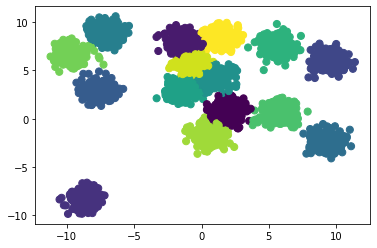

In [21]:
plt.scatter(fX[:, 0], fX[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [22]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

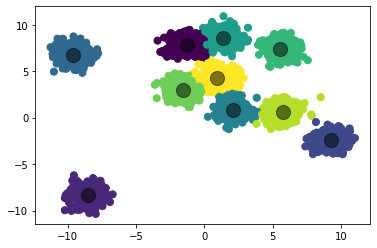

In [17]:
plt.scatter(fX[:, 0], fX[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()